Logistic Regression

In this lab session we are going to learn about classification problems which is predict analysis algorithm and based on the concept of probability. Thus, this alogorithm is called Logistic Regression which is statistical method for anlayzing a dataset in which there are one or more independent variables that determine an outcome where outcome measured with a dichotomous variable in which there are only two possible outcomes. <br>

For Example,
1. To predict whether a email is Spam (1) or Ham (0)
2. Whether a tumor is malignant (1) or not (0)
<br>

Consider a scenario in which we need to sort out whether an email is spam or not, if we use linear regression for this problem, there is need of setting up a threshold based on which classification can be done. Thus, Linear regression may be inferred as not suitable for classification problem and not bounded then the concept of Logistic Regression comes in that ranges from 0 to 1.

The Logistic Regression is named for the function used as the core of the method, the logistic function (sigmoid function) which was developed by statisticians to explain the properties growth in ecology, rising rapidly and maxing out the envoironmental carrying capacity. This function is S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly exactly at those points. 

\begin{equation*}
S =  \frac{1}{(1 + e^{-x})}.
\end{equation*}

where e is the base of the natural logarithms. 

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing the dataset

The below command is used to import CSV dataset

In [2]:
dataset = pd.read_csv('./dataset./Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## To check whether cell is empty or not

In [3]:
dataset.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

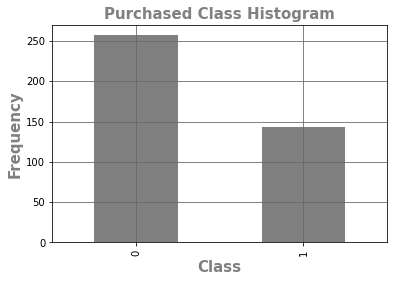

In [4]:
classes_count = pd.value_counts(dataset['Purchased'],sort = True).sort_index()
classes_count.plot(kind='bar', color = "Gray")
plt.title('Purchased Class Histogram', fontweight='bold', fontsize = '15', color = "gray")
plt.xlabel('Class', fontweight='bold', fontsize = '15', color = "gray")
plt.ylabel('Frequency', fontweight='bold', fontsize = '15', color = "gray")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

Let's checlk number of rows and columns in our dataset where there are 400 number of rows and 5 number of columns

In [5]:
dataset.shape

(400, 5)

Pandas's describe() method is used to view basic statistical details like percentile, mean, std etc.

In [6]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
qualified = dataset[dataset['Purchased'] == 1 ]
non_qualified = dataset[dataset['Purchased'] == 0]
print('Qualified person:',qualified.shape)
print('Not Qualified person:',non_qualified.shape)

Qualified person: (143, 5)
Not Qualified person: (257, 5)


In [7]:
qualified = dataset[dataset['Purchased'] == 1]
non_qualified = dataset[dataset['Purchased'] == 0]
print('Qualified person:' , qualified.shape)
print('Not qualified person:' , non_qualified.shape)

Qualified person: (143, 5)
Not qualified person: (257, 5)


Pandas's value_counts() method is the built in pandas function that returns an object containing counts of unique value in sorted order. 

In [8]:
dataset.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [8]:
dataset.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [9]:
print(qualified.EstimatedSalary.describe())

count       143.000000
mean      86272.727273
std       42064.200064
min       20000.000000
25%       41000.000000
50%       90000.000000
75%      122500.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64


## Describing EstimatedSalary Column

In [9]:
print(qualified.EstimatedSalary.describe())

count       143.000000
mean      86272.727273
std       42064.200064
min       20000.000000
25%       41000.000000
50%       90000.000000
75%      122500.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64


## Describing Age column

In [10]:
print(non_qualified.EstimatedSalary.describe())

count       257.000000
mean      60544.747082
std       24351.570102
min       15000.000000
25%       44000.000000
50%       61000.000000
75%       77000.000000
max      141000.000000
Name: EstimatedSalary, dtype: float64


In [10]:
print(non_qualified.EstimatedSalary.describe())

count       257.000000
mean      60544.747082
std       24351.570102
min       15000.000000
25%       44000.000000
50%       61000.000000
75%       77000.000000
max      141000.000000
Name: EstimatedSalary, dtype: float64


## Data Processing

StandardScaler performs the task of Standardization. Usually a dataset contains variables thar are different scale. <br>
For Example:
An Employee dataset will contain AGE column with values on Scale 20-70 and Salary column with Values on scale 10000 - 100000.
As these two columns are different in scale, they are Standardized to have common scale while building machine learning model

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset['normalized_age'] = scaler.fit_transform(dataset['Age'].values.reshape(-1,1))
dataset['normalized_salary'] = scaler.fit_transform(dataset['EstimatedSalary'].values.reshape(-1,1))


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset['normalized_age'] = scaler.fit_transform(dataset['Age'].values.reshape(-1,1))
dataset['normalized_salary'] = scaler.fit_transform(dataset['EstimatedSalary'].values.reshape(-1,1))


## Droping unnecessary column

In [12]:
dataset = dataset.drop(['User ID','Gender','Age','EstimatedSalary'],axis = 1)

In [12]:
dataset = dataset.drop(['User ID','Gender','Age', 'EstimatedSalary'],axis = 1)

In [13]:
dataset.head()

,Purchased,normalized_age,normalized_salary
0,0,-1.781797,-1.490046
1,0,-0.253587,-1.460681
2,0,-1.113206,-0.785290
3,0,-1.017692,-0.374182
4,0,-1.781797,0.183751


In [14]:
print(dataset.normalized_salary.describe())

count    4.000000e+02
mean    -1.776357e-17
std      1.001252e+00
min     -1.607506e+00
25%     -7.852897e-01
50%      7.561451e-03
75%      5.361289e-01
max      2.356750e+00
Name: normalized_salary, dtype: float64


In [14]:
print(dataset.normalized_salary.describe())

count    4.000000e+02
mean    -1.776357e-17
std      1.001252e+00
min     -1.607506e+00
25%     -7.852897e-01
50%      7.561451e-03
75%      5.361289e-01
max      2.356750e+00
Name: normalized_salary, dtype: float64


In [15]:
print(dataset.normalized_age.describe())

count    4.000000e+02
mean    -7.105427e-17
std      1.001252e+00
min     -1.877311e+00
25%     -7.550313e-01
50%     -6.256110e-02
75%      7.970571e-01
max      2.134241e+00
Name: normalized_age, dtype: float64


Now, next task is to seperate features and label from our normalized dataset. Our normalizd dataset contains 3 columns where 'normalized_age' and 'normalized_salary' is the independent variables which are features. 'Purchased' column is dependent variables which set as label.

In [16]:
features = dataset.iloc[:,dataset.columns != 'Purchased'].values
features

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [16]:
features = dataset.iloc[:,dataset.columns != 'Purchased'].values
# features

In [17]:
label= dataset.iloc[:, dataset.columns == 'Purchased'].values
# label

Visulizing above graph with class 0 and class 1 where 143 number people puchased a car rest 257 are not able to purchased a car. So, there high number of people who are not able to purchased a car. Thus, classification dataset are consisder as imbalanced data which means number of observation is not the same for all the classed in a classification dataset. SMOTE is a very simple algorithm for imbalance dataset to generate synthetic samples. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [20]:
from imblearn.over_sampling import SMOTE as sm
x_sampled,y_sampled = sm().fit_resample(features, label)
from collections import Counter ##seperate collection for 0 and 1
print(sorted(Counter(y_sampled).items()))

[(0, 257), (1, 257)]


In [18]:
from imblearn.over_sampling import SMOTE as sm
x_sampled , y_sampled = sm().fit_resample(features, label)
from collections import Counter ## separate collection for 0 and 1 
print(sorted(Counter(y_sampled).items()))

[(0, 257), (1, 257)]


## Graph after using SMOTE 

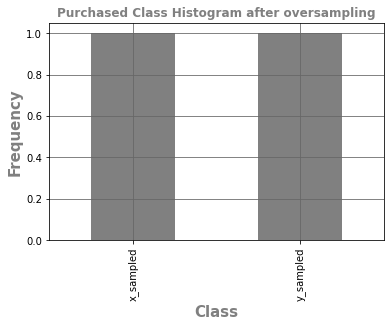

In [21]:
classes_count = pd.value_counts(['x_sampled','y_sampled'],sort = True).sort_index()
classes_count.plot(kind='bar',color = "gray")
plt.title('Purchased Class Histogram after oversampling',fontweight='bold',fontsize = '12',color = "gray")
plt.xlabel('Class',fontweight='bold',fontsize = '15',color = "gray")
plt.ylabel('Frequency',fontweight='bold',fontsize = '15',color = "gray")
plt.grid(b=True, which='major',color='#666666', linestyle='-')
plt.show()

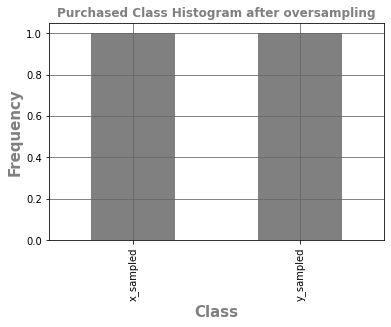

In [19]:
classes_count = pd.value_counts(['x_sampled' , 'y_sampled' ],sort = True).sort_index()
classes_count.plot(kind='bar', color = "Gray")
plt.title('Purchased Class Histogram after oversampling', fontweight='bold', fontsize = '12', color = "gray")
plt.xlabel('Class', fontweight='bold', fontsize = '15', color = "gray")
plt.ylabel('Frequency', fontweight='bold', fontsize = '15', color = "gray")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

Sklearn provides best function for partioning data into training set and testing set. We provide certain proportion of data to use as test set and we can provide the parameter random_state to ensure repeatable resuts. We split 80% of the data to the training set while 20% of data to the test using the below code. The test_size variable is where specify the propostion of the test set.

In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size = 0.2, random_state = 584)

x_test_sampled_data  = pd.DataFrame(X_test)

y_test_sampled_data  = pd.DataFrame(y_test)

In [23]:
print('Number of train set is', X_train.shape)
print('Number of train set is', X_test.shape)

Number of train set is (411, 2)
Number of train set is (103, 2)


After spliting data into train set and test set, now our job is to train our algorithm. For that we need to import LogisticRegression.

Now, call the fit() method along with our training data. After training our algorithm, now time to make some predictions. For this we are going to use our test data and see how correctly our algorithm predicts the percentage score.

The most common cross-validation technique is k-fold cross-validation in our solution I have put the value of K = 5 which means dataset will run 5 times and below the process will run 5 times, each time with different output set



In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)
yPred = model.predict(X_test)
scores = cross_val_score(model, y_test_sampled_data, yPred, cv=5, scoring='accuracy')
print(scores)

[0.76190476 0.80952381 0.85714286 0.8        0.85      ]


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)
yPred = model.predict(X_test)
scores = cross_val_score(model, y_test_sampled_data, yPred, cv=5, scoring='accuracy')
print(scores)

[0.85714286 0.95238095 0.80952381 0.8        0.75      ]


In [26]:
print(scores.mean())

0.8157142857142856


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


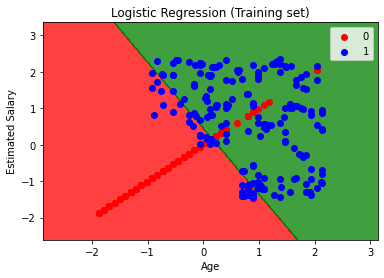

In [28]:
#Visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() -1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1,X2,model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],X_set[y_set == j, i],
                c = ListedColormap(('red','blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


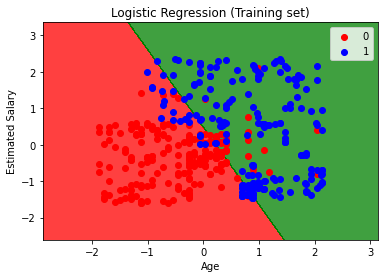

In [24]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

1. The library provided by matplotlib called ListedColormap helps us to colorize the data points. <br>
2. We create local variables i.e. X_set and y_set for reuse of these variables again in the test set. <br>
3. step = 0.01 is the parameter used in variables X_set and X_set which is used to create grid with 0.01 resolution and similarly, min and max parameter of X_set with -1 and +1 which is used to prevent points to be squeezed on the axes.
4. contour function is an outline representing or bounding t  the model on all pixel of observation points having red pixel points and blue pixel points. 
5. And then we have plot the limits of the age and estimated salary lines.
6. In above code we have created a loop to plots all the data points of age and estimated salary with the real values.
7. At last we have give the name of the plot and labels.
<br>

In the above visulized points blue points represents as 0 are the ones who are purchasing the car and red points represents as 1 are ones who are not purchasing the car where the division line between the red points and blue points are called prediction boundary. The main goal of logistic regression model is to classify the right users into right categories. The line is straight, since our model has established a linear classification. In the upper case the dataset is the training set so the model learned how to classify based on this knowledge.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


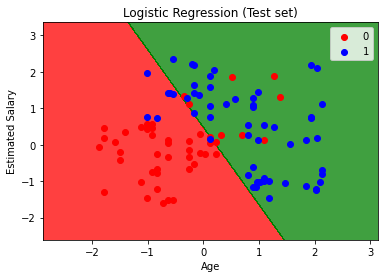

In [25]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In the confusion matrix we might observe the correct and incorrect predictions.

A  confusion matrix  is an N by N matrix where N is the number of classes being predicted. Confusion matrix provide a more detailed breakdown of correct and incorrect classifications for each class where daigonal elements represents the number of points for which the predicted label is equal to the true label while anything off the diagonal was mislabeled by the classifier.
For best evaluation we need higher value in the diagonal of the confusion matrix.

In [29]:
from sklearn.metrics import confusion_matrix, classification_report 

y_predicted =  np.array(model.predict(x_test_sampled_data))
y_right = np.array(y_test_sampled_data)

cnf = confusion_matrix(y_right, y_predicted )
print(cnf)


[[38  9]
 [10 46]]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_right, y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        47
           1       0.84      0.82      0.83        56

    accuracy                           0.82       103
   macro avg       0.81      0.81      0.81       103
weighted avg       0.82      0.82      0.82       103



Accuracy is the mostly common used matrix to evaulated the model which is actually not a clear indicator of the performance. 

Accuracy = (41 + 49 ) / (41 + 7 + 49 + 6) = 0.8737864078

Precision is the percentage of positive instances out of the total predicted positive instances which means precision or positive predicted value means how much model is right when it says it is right.

Precision of Class 0 = 41 / (41 + 7) = 0.8541666667
Precision of Class 1 = 49 / (6 + 49) = 0.8909090909

Recall  is the percentage of positive instances out of the total actual positive instances. Recall shows how much extra right ones, the model missed when os showed the right ones.

Recall of Class 0 = 41 / (41 + 6 ) = 0.8723404255
Recall of Class 1 = 49 / (49 + 7) = 0.875

F1-Score: F1- score is the harmoncic mean of the precision and recall which means higher the value of f1-score better will be the model. due to the product in the numerator if one goes low, the final F1 score goes down significantly. So a model does well in F1 score if the positive predicted are actually positives (precision) and doesn't miss out on positives and predicts them negative (recall).

F1-Score of Class 0 = 2PR/(P+R) = 2 * 0.8541666667 * 0.8723404255 / (0.8541666667 + 0.8723404255) = 0.8631578947

F1-Score of Class 1 = 2PR/(P+R) = 2 * 0.8909090909 * 0.875 / (0.8909090909 + 0.875) = 0.8828828829

Support : It is the total number of element in each predicted class. Here, support for class 0 and 1 are 47 and 56.

Macro Average: It is the normal average

Macro Average for Precision: (0.8541666667 +0.8909090909) / 2 = 0.8725378788

Macro Average for Recall: (0.8723404255 + 0.875) / 2 = 0.8736702128

Weighted Average = The method of calculating a kind of arithmetic mean of a set of numbers in which some elements of the set have greater (weight) value than others

Weighted Average of Precision = (0.8541666667 * 48) + (0.8909090909 * 55) / 103 = 0.8737864121

Weighted Average of Recall = (0.8723404255 * 47) + (0.875 * 56) / 103 = 0.8737864078

Thus, after calculating these results, we can conclude that this model is highlu sensitive for class 0 and highly precise for class 1 

<AxesSubplot:>

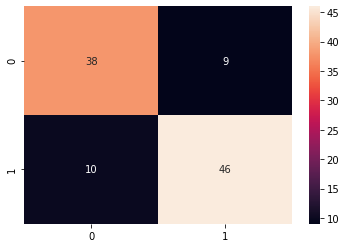

In [32]:
import seaborn as sns
sns.heatmap(cnf , annot =  True)

<h1> End of Assignment </h1> 